In [83]:
dataset_path = "E:\MV-coursework\Augmented_Car_Logo_Dataset+"
dataset_name = dataset_path.split('_')[0]
print('dataset', dataset_name)

dataset E:\MV-coursework\Augmented


In [45]:

import random
import os

In [85]:
classes = os.listdir(dataset_path)

In [86]:
len(classes)

32

In [87]:
classes

['1-Volvo',
 '10-BMW',
 '11-Jeep',
 '12-Kia',
 '13-Citroen',
 '14-Land Rover',
 '15-Lexus',
 '16-Mazda',
 '17-Mercedes',
 '18-Mini',
 '19-Mitsubishi',
 '2-Volkswagen',
 '20-Nissan',
 '21-Opel',
 '22-Peugeot',
 '23-Renault',
 '24-Seat',
 '25-GMC',
 '26-Smart',
 '27-Subaru',
 '28-Suzuki',
 '29-Tesla',
 '3-Hyundai',
 '30-Toyota',
 '31-Alfa Romeo',
 '32-Acura',
 '4-Lancia',
 '5-Dacia',
 '6-Daewoo',
 '7-Ford',
 '8-Skoda',
 '9-Honda']

In [88]:
os.makedirs(os.path.join(dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(dataset_path, 'val'), exist_ok=True)
for PlantVillage in classes:
    os.makedirs(os.path.join(dataset_path, 'train', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'test', PlantVillage), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, 'val', PlantVillage), exist_ok=True)

In [89]:
test_frac = 0.15
val_frac = 0.15
random.seed(123)

In [90]:
import os
import random
import shutil
import pandas as pd

# Create a DataFrame
df = pd.DataFrame()

print('{:^18} {:^18} {:^18} {:^18}'.format('categories', 'training set number', 'val set number', 'test set number'))

for PlantVillage in classes:
    old_dir = os.path.join(dataset_path, PlantVillage)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) 

    testset_number = int(len(images_filename) * test_frac) 
    valset_number = int(len(images_filename) * val_frac)   
    testset_images = images_filename[:testset_number]    
    valset_images = images_filename[testset_number:testset_number + valset_number] 
    trainset_images = images_filename[testset_number + valset_number:] 

    for image in testset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)     
        new_test_path = os.path.join(dataset_path, 'test', PlantVillage, image) 
        shutil.move(old_img_path, new_test_path) 

    for image in valset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)           
        new_val_path = os.path.join(dataset_path, 'val', PlantVillage, image) 
        shutil.move(old_img_path, new_val_path) 

    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, PlantVillage, image)        
        new_train_path = os.path.join(dataset_path, 'train', PlantVillage, image) 
        shutil.move(old_img_path, new_train_path)

    assert len(os.listdir(old_dir)) == 0 
    shutil.rmtree(old_dir) 

    print('{:^18} {:^18} {:^18} {:^18}'.format(PlantVillage, len(trainset_images),len(valset_images), len(testset_images)))

    new_row = {'class': PlantVillage, 'trainset': len(trainset_images), 'valset': len(valset_images), 'testset': len(testset_images)}
    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

shutil.move(dataset_path, dataset_name+'_split')

df['total'] = df['trainset'] + df['valset'] + df['testset']
df.to_csv('Data volume statistics.csv', index=False)

    categories     training set number   val set number    test set number  
     1-Volvo              350                 75                 75        
      10-BMW              350                 75                 75        
     11-Jeep              350                 75                 75        
      12-Kia              350                 75                 75        
    13-Citroen            350                 75                 75        
  14-Land Rover           350                 75                 75        
     15-Lexus             350                 75                 75        
     16-Mazda             350                 75                 75        
   17-Mercedes            350                 75                 75        
     18-Mini              350                 75                 75        
  19-Mitsubishi           350                 75                 75        
   2-Volkswagen           350                 75                 75        
    20-Niss

In [91]:
dataset_dir = 'Car_split'

In [91]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [92]:
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')
print('trainpath', train_dir)
print('valpath', val_dir)
print('testpath', test_dir)

NameError: name 'dataset_dir' is not defined

In [68]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [69]:
train_dir = "E:\\MV-coursework\\Augmented_split\\train"
val_dir = "E:\\MV-coursework\\Augmented_split\\val"  # Replace with the correct path for validation data
test_dir = "E:\\MV-coursework\\Augmented_split\\test"

In [70]:
batch_size1 = 8
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size1,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size1,
    shuffle = False,
    class_mode='categorical'
    
    # subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size1,
    shuffle = False,
    class_mode='categorical'
)

Found 8960 images belonging to 32 classes.
Found 2400 images belonging to 32 classes.
Found 2400 images belonging to 32 classes.


In [71]:
print('trainset number', len(train_generator))
print('categories number', len(train_generator.class_indices.keys()))
print('categories name', train_generator.class_indices.keys())

trainset number 1120
categories number 32
categories name dict_keys(['1-Volvo', '10-BMW', '11-Jeep', '12-Kia', '13-Citroen', '14-Land Rover', '15-Lexus', '16-Mazda', '17-Mercedes', '18-Mini', '19-Mitsubishi', '2-Volkswagen', '20-Nissan', '21-Opel', '22-Peugeot', '23-Renault', '24-Seat', '25-GMC', '26-Smart', '27-Subaru', '28-Suzuki', '29-Tesla', '3-Hyundai', '30-Toyota', '31-Alfa Romeo', '32-Acura', '4-Lancia', '5-Dacia', '6-Daewoo', '7-Ford', '8-Skoda', '9-Honda'])


In [72]:
print('val number', len(validation_generator))
print('categories number', len(validation_generator.class_indices.keys()))
print('categories name', validation_generator.class_indices.keys())

val number 300
categories number 32
categories name dict_keys(['1-Volvo', '10-BMW', '11-Jeep', '12-Kia', '13-Citroen', '14-Land Rover', '15-Lexus', '16-Mazda', '17-Mercedes', '18-Mini', '19-Mitsubishi', '2-Volkswagen', '20-Nissan', '21-Opel', '22-Peugeot', '23-Renault', '24-Seat', '25-GMC', '26-Smart', '27-Subaru', '28-Suzuki', '29-Tesla', '3-Hyundai', '30-Toyota', '31-Alfa Romeo', '32-Acura', '4-Lancia', '5-Dacia', '6-Daewoo', '7-Ford', '8-Skoda', '9-Honda'])


In [73]:
print('test number', len(test_generator))
print('categories number', len(test_generator.class_indices.keys()))
print('categories name',test_generator.class_indices.keys())

test number 300
categories number 32
categories name dict_keys(['1-Volvo', '10-BMW', '11-Jeep', '12-Kia', '13-Citroen', '14-Land Rover', '15-Lexus', '16-Mazda', '17-Mercedes', '18-Mini', '19-Mitsubishi', '2-Volkswagen', '20-Nissan', '21-Opel', '22-Peugeot', '23-Renault', '24-Seat', '25-GMC', '26-Smart', '27-Subaru', '28-Suzuki', '29-Tesla', '3-Hyundai', '30-Toyota', '31-Alfa Romeo', '32-Acura', '4-Lancia', '5-Dacia', '6-Daewoo', '7-Ford', '8-Skoda', '9-Honda'])


In [74]:
class_names = train_generator.class_indices
n_class = len(class_names)

In [75]:
class_names

{'1-Volvo': 0,
 '10-BMW': 1,
 '11-Jeep': 2,
 '12-Kia': 3,
 '13-Citroen': 4,
 '14-Land Rover': 5,
 '15-Lexus': 6,
 '16-Mazda': 7,
 '17-Mercedes': 8,
 '18-Mini': 9,
 '19-Mitsubishi': 10,
 '2-Volkswagen': 11,
 '20-Nissan': 12,
 '21-Opel': 13,
 '22-Peugeot': 14,
 '23-Renault': 15,
 '24-Seat': 16,
 '25-GMC': 17,
 '26-Smart': 18,
 '27-Subaru': 19,
 '28-Suzuki': 20,
 '29-Tesla': 21,
 '3-Hyundai': 22,
 '30-Toyota': 23,
 '31-Alfa Romeo': 24,
 '32-Acura': 25,
 '4-Lancia': 26,
 '5-Dacia': 27,
 '6-Daewoo': 28,
 '7-Ford': 29,
 '8-Skoda': 30,
 '9-Honda': 31}

In [76]:
idx_to_labels = {y:x for x,y in train_generator.class_indices.items()}

In [77]:
idx_to_labels

{0: '1-Volvo',
 1: '10-BMW',
 2: '11-Jeep',
 3: '12-Kia',
 4: '13-Citroen',
 5: '14-Land Rover',
 6: '15-Lexus',
 7: '16-Mazda',
 8: '17-Mercedes',
 9: '18-Mini',
 10: '19-Mitsubishi',
 11: '2-Volkswagen',
 12: '20-Nissan',
 13: '21-Opel',
 14: '22-Peugeot',
 15: '23-Renault',
 16: '24-Seat',
 17: '25-GMC',
 18: '26-Smart',
 19: '27-Subaru',
 20: '28-Suzuki',
 21: '29-Tesla',
 22: '3-Hyundai',
 23: '30-Toyota',
 24: '31-Alfa Romeo',
 25: '32-Acura',
 26: '4-Lancia',
 27: '5-Dacia',
 28: '6-Daewoo',
 29: '7-Ford',
 30: '8-Skoda',
 31: '9-Honda'}

In [78]:
import numpy as np
np.save('idx_to_labels.npy', idx_to_labels)
np.save('labels_to_idx.npy', train_generator.class_indices)

In [79]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, Model
from keras.layers import ReLU, Add, GlobalAveragePooling2D, Dense,MaxPooling2D
import numpy as np
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [80]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K

# 通道注意力机制
def channel_attention(input_feature):
    channel_axis = -1  
    channels = input_feature.shape[channel_axis]

    shared_layer_one = Dense(channels // 8,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channels,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

    avg_pooling = GlobalAveragePooling2D()(input_feature)    
    avg_pooling = Reshape((1, 1, channels))(avg_pooling)
    avg_pooling = shared_layer_one(avg_pooling)
    avg_pooling = shared_layer_two(avg_pooling)

    max_pooling = GlobalMaxPooling2D()(input_feature)
    max_pooling = Reshape((1, 1, channels))(max_pooling)
    max_pooling = shared_layer_one(max_pooling)
    max_pooling = shared_layer_two(max_pooling)

    x = Add()([avg_pooling, max_pooling])
    x = Activation('sigmoid')(x)

    return multiply([input_feature, x])
#

# 空间注意力机制
def spatial_attention(input_feature):
    kernel_size = 7

    avg_pool = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(input_feature)
    max_pool = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(input_feature)
    concat = Concatenate(axis=-1)([avg_pool, max_pool])
    
    x = Conv2D(filters=1,
               kernel_size=kernel_size,
               strides=1, 
               padding='same',
               activation='sigmoid',
               kernel_initializer='he_normal',
               use_bias=False)(concat)                   

    return multiply([input_feature, x])


In [81]:
from keras.layers import Add

def residual_block(input_tensor, filters, kernel_size=3, stride=1):
    # 主路径
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    # 残差路径
    shortcut = input_tensor
    if stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=stride, padding='same')(input_tensor)
        shortcut = BatchNormalization()(shortcut)

    # 将残差路径的输出加到主路径上
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x


In [82]:
def depthwise_separable_conv(x, filters):
    # 深度卷积
    x = DepthwiseConv2D(kernel_size=(3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # 逐点卷积
    x = Conv2D(filters, kernel_size=(1, 1), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x


In [83]:
def res_block(input_shape, filters, strides=1):
    #
    shortcut = input_shape

    x = Conv2D(filters, (1,1), strides=1, padding='same')(input_shape)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (3,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters, (1,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters*4, (1,1), padding='same')(x)
    x = BatchNormalization()(x)
    # Skip connection
    if strides !=1 or shortcut.shape[-1]!= filters*4:
        shortcut = Conv2D(filters*4, (1,1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    # Add the shortcut to the main path
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

In [84]:
def inception_module(input_tensor, filter_channels):
   
    branch_1x1 = Conv2D(filter_channels, (1,1), padding='same', activation='relu')(input_tensor)

    # 1x7 conv branch
    # First 1x1 conv
    branch_1x7 = Conv2D(filter_channels, (1,1), padding='same', activation='relu')(input_tensor)
    # 1x7 conv
    branch_1x7 = Conv2D(filter_channels, (1,7), padding='same', activation='relu')(branch_1x7)
    # 7x1 conv
    branch_1x7 = Conv2D(filter_channels, (7,1), padding='same', activation='relu')(branch_1x7)

    # 7x1 followed by 1x7 conv branch (double)
    # First 1x1 conv
    branch_7x1_double = Conv2D(filter_channels, (1,1), padding='same', activation='relu')(input_tensor)
    # First 7x1 conv
    branch_7x1_double = Conv2D(filter_channels, (7,1), padding='same', activation='relu')(branch_7x1_double)
    # Second 1x7 conv
    branch_7x1_double = Conv2D(filter_channels, (1,7), padding='same', activation='relu')(branch_7x1_double)
    # Second 7x1 conv
    branch_7x1_double = Conv2D(filter_channels, (7,1), padding='same', activation='relu')(branch_7x1_double)

    # Concatenate all the branches
  
    output=Concatenate(axis=-1)([branch_1x1, branch_1x7, branch_7x1_double])

    return output

In [89]:
from keras import layers, Model

In [90]:
input_img = layers.Input(shape=(128, 128, 3))

In [91]:
input_1 = input_img
x = Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu')(input_1)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
# 添加残差模块
x = residual_block(x, 96)

x = Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

# 使用深度可分离卷积层
#x = depthwise_separable_conv(x, 384)

x = Conv2D(384, kernel_size=(1, 3), activation='relu', padding='same')(x)
x = channel_attention(x)
x = spatial_attention(x)
x = Conv2D(256, kernel_size=(3, 1), activation='relu', padding='same',name='last_conv_model_1')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

model_1_output = GlobalAveragePooling2D()(x)


model_1 = Model(inputs=input_1, outputs=model_1_output)


In [148]:
# Model 2
input_2 = input_img

x = Conv2D(64, (7,7), activation='relu')(input_2)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (1,1), activation='relu')(x)
x = BatchNormalization()(x)

# 添加通道注意力和空间注意力机制
x = inception_module(x, 64)


x = channel_attention(x)
x = spatial_attention(x)

x = MaxPooling2D(2,2)(x)

x = inception_module(x, 64)
x = MaxPooling2D(2,2)(x)

x = inception_module(x, 64)
x = MaxPooling2D(2,2)(x)

x

model_2_output= GlobalAveragePooling2D()(x)


model_2 = Model(inputs=input_2, outputs=model_2_output)

In [149]:
# Ensemble Model
merged_output = Concatenate()([model_1_output, model_2_output])
x = Dense(128, activation='relu')(merged_output)
final_output = Dense(32, activation='softmax')(x)
ensemble_model = Model(inputs=input_img, outputs=final_output)

In [150]:
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [151]:
ensemble_model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_85 (Conv2D)             (None, 122, 122, 64  9472        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_17 (BatchN  (None, 122, 122, 64  256        ['conv2d_85[0][0]']              
 ormalization)                  )                                                          

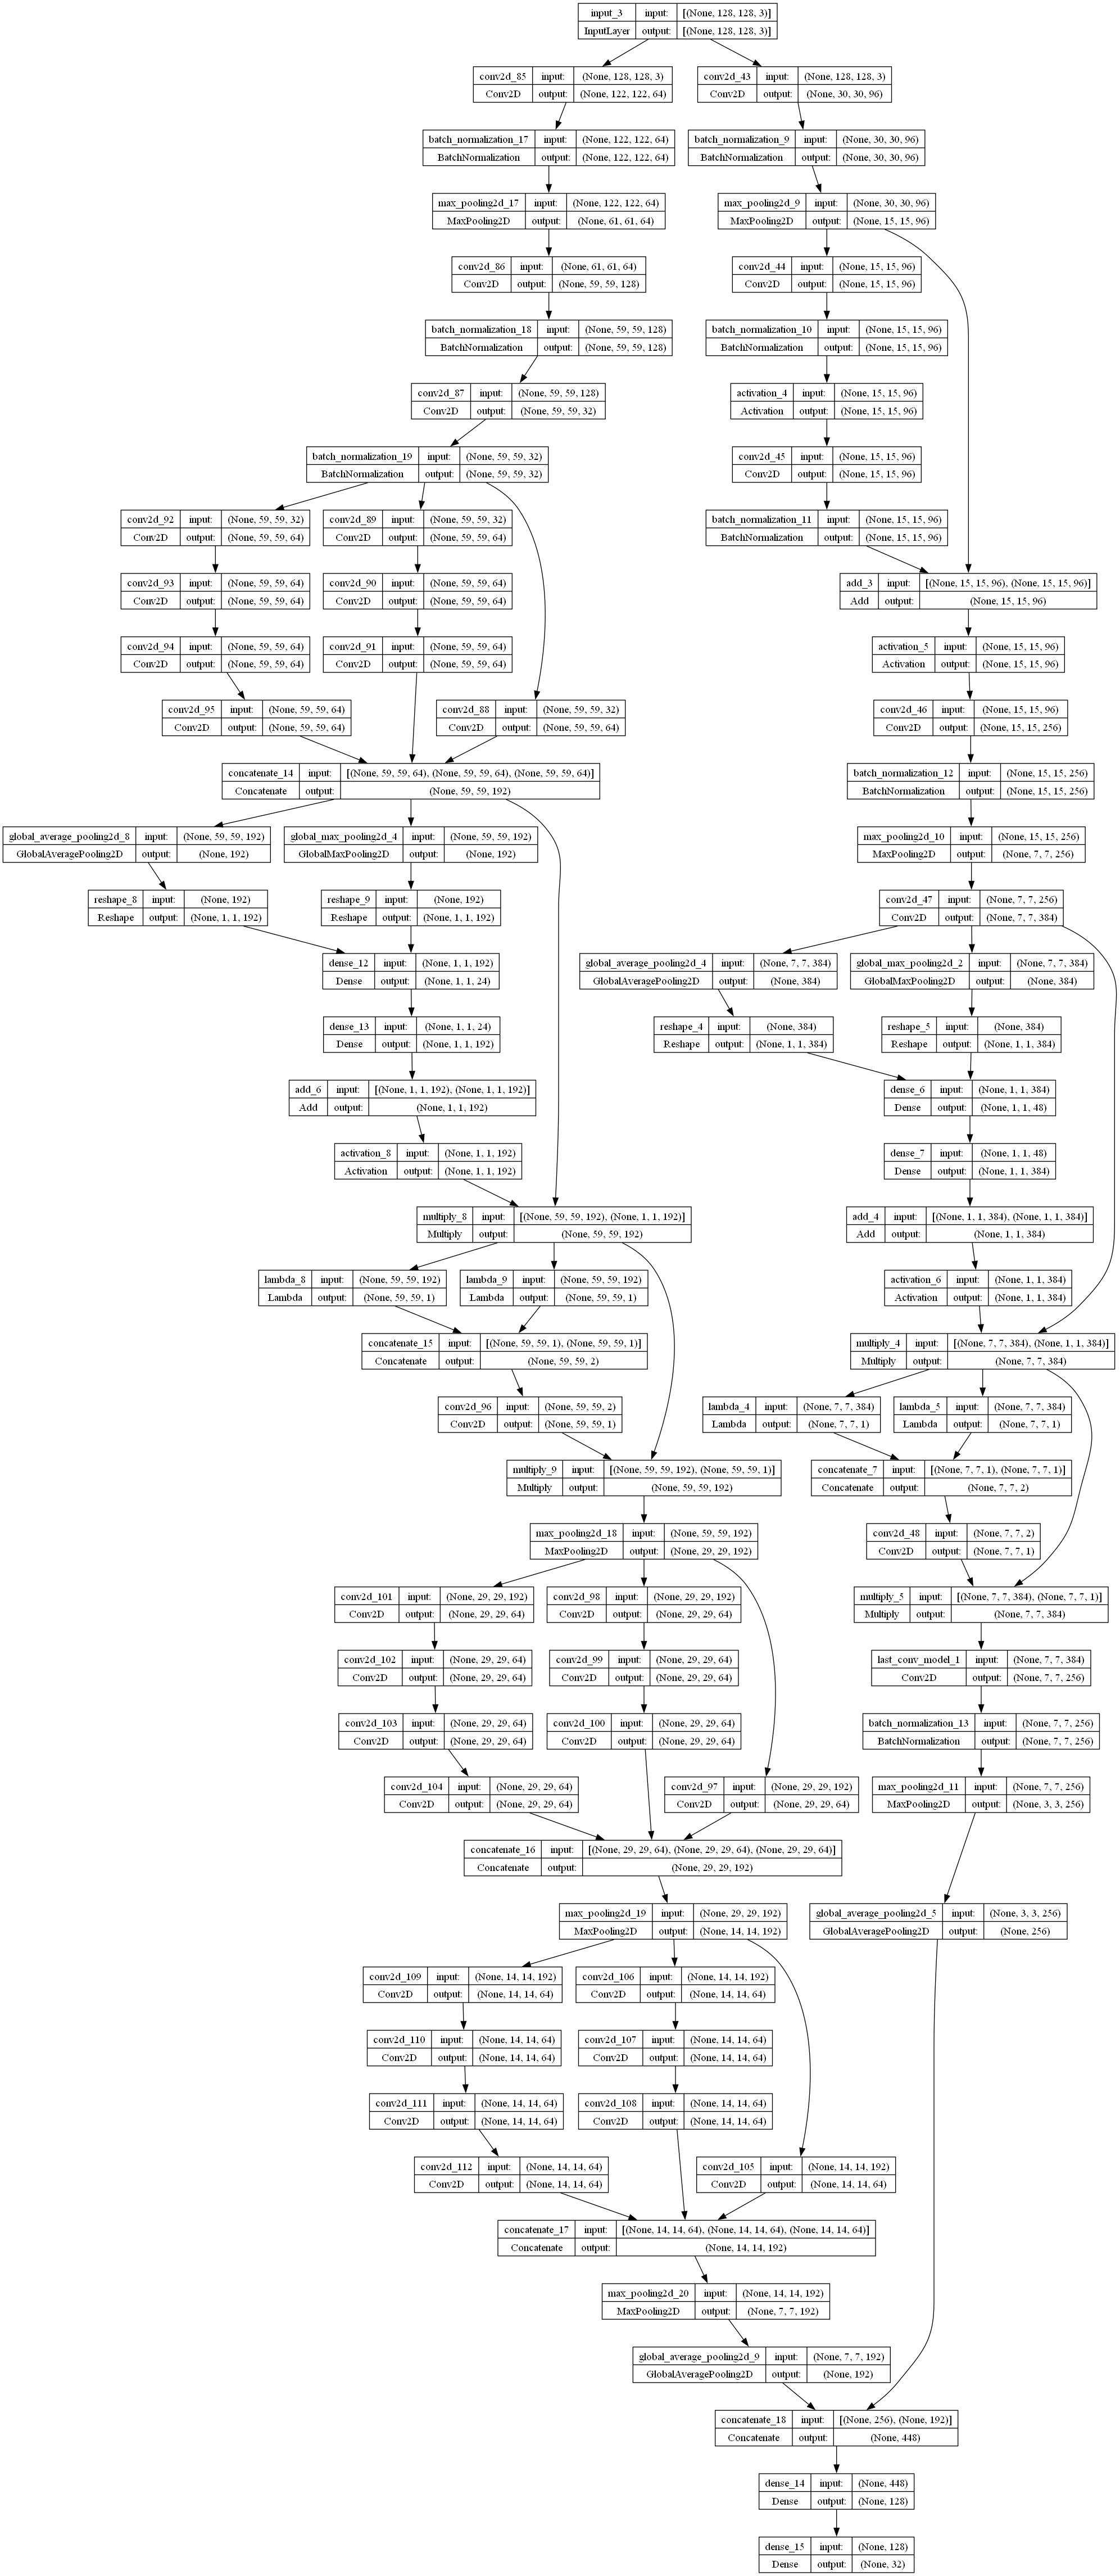

In [152]:
from keras.utils.vis_utils import plot_model
plot_model(ensemble_model, to_file='ensemble_model_plot.png', show_shapes=True, show_layer_names=True) 

In [153]:
def custom_categorical_crossentropy(y_true, y_pred, label_smoothing=0.1):
    num_classes=32
    epsilon = tf.keras.backend.epsilon()
    y_true_smoothed = y_true * (1.0 - label_smoothing) + label_smoothing / num_classes
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    cce = -tf.reduce_sum(y_true_smoothed * tf.math.log(y_pred), axis=-1)
    return tf.reduce_mean(cce)
def custom_categorical_accuracy(y_true, y_pred, threshold=0.5):
    y_pred_thresholded = tf.cast(y_pred > threshold, tf.float32)
    correct_predictions = tf.equal(y_true, tf.round(y_pred_thresholded))
    accuracy = tf.reduce_mean(tf.cast(tf.reduce_all(correct_predictions, axis=-1), tf.float32))
    return accuracy

In [154]:
learning_rate1 = 0.0001 
epochs1 = 10
ensemble_model.compile(loss=custom_categorical_crossentropy, optimizer= Adam(learning_rate=learning_rate1), metrics=[custom_categorical_accuracy])

In [155]:

history = ensemble_model.fit(train_generator,validation_data=validation_generator, epochs=epochs1,verbose=1)

Epoch 1/10
1120/1120 [==============================] - 63s 53ms/step - loss: 1.4115 - custom_categorical_accuracy: 0.5537 - val_loss: 0.9269 - val_custom_categorical_accuracy: 0.9496
Epoch 2/10
1120/1120 [==============================] - 58s 52ms/step - loss: 0.9199 - custom_categorical_accuracy: 0.8674 - val_loss: 0.8602 - val_custom_categorical_accuracy: 0.9792
Epoch 3/10
1120/1120 [==============================] - 58s 52ms/step - loss: 0.8493 - custom_categorical_accuracy: 0.9104 - val_loss: 0.8260 - val_custom_categorical_accuracy: 0.9983
Epoch 4/10
1120/1120 [==============================] - 58s 52ms/step - loss: 0.8061 - custom_categorical_accuracy: 0.9333 - val_loss: 0.8120 - val_custom_categorical_accuracy: 1.0000
Epoch 5/10
1120/1120 [==============================] - 58s 52ms/step - loss: 0.7857 - custom_categorical_accuracy: 0.9416 - val_loss: 0.8416 - val_custom_categorical_accuracy: 0.8933
Epoch 6/10
1120/1120 [==============================] - 58s 52ms/step - loss: 0.

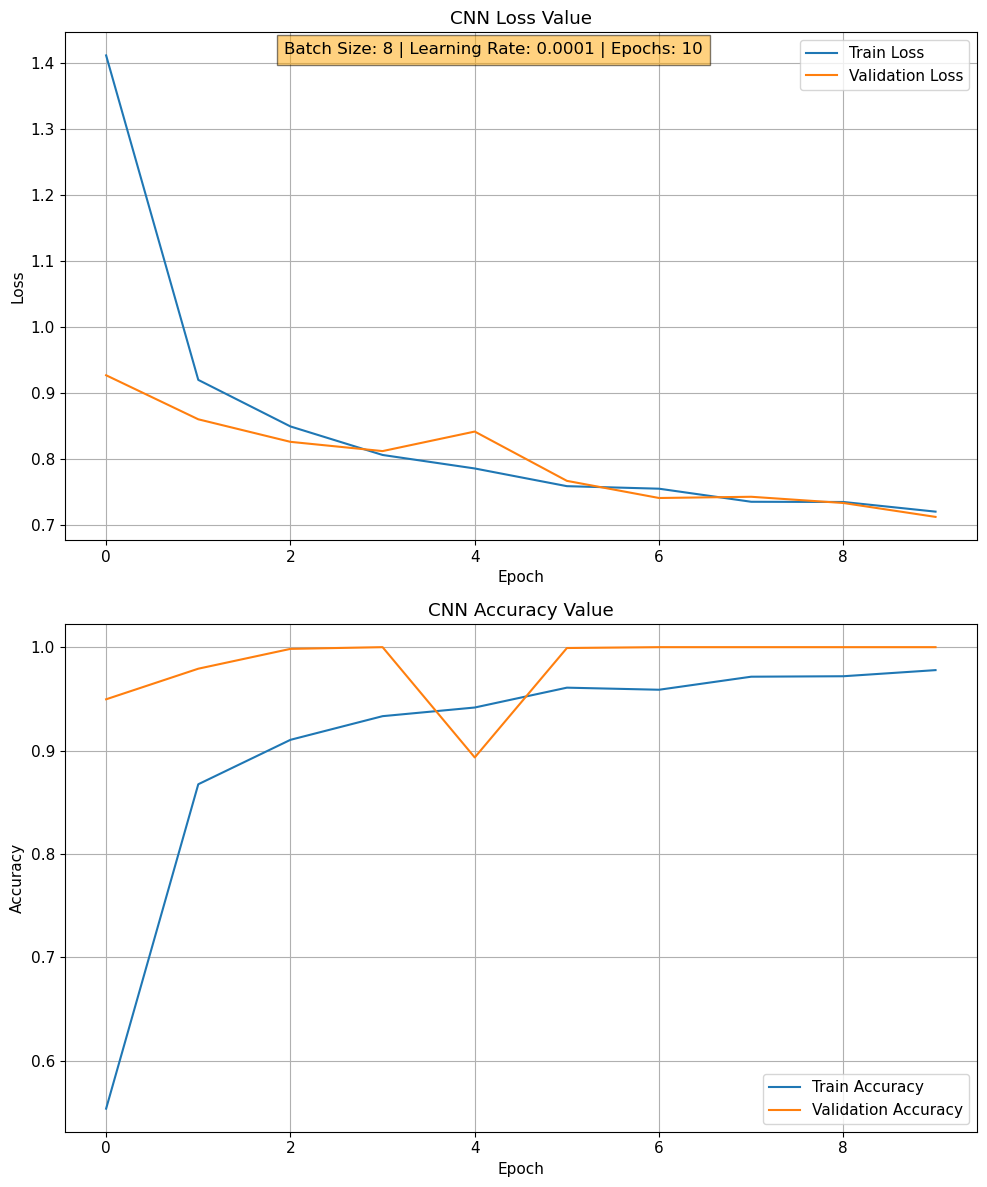

In [156]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))


ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title("CNN Loss Value")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(history.history['custom_categorical_accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_custom_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title("CNN Accuracy Value")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# 调整子图间距以避免重叠
plt.subplots_adjust(top=0.5)  # 留出顶部空间

# 在图表的顶部中央位置显示训练配置信息
info_text = f"Batch Size: {batch_size1} | Learning Rate: {learning_rate1} | Epochs: {epochs1}"
plt.figtext(0.5, 0.95, info_text, ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()


In [157]:
x_test, y_test = test_generator.next()
test_loss, test_acc = ensemble_model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 253ms/step - loss: 0.7399 - custom_categorical_accuracy: 1.0000
Test accuracy: 1.0


In [1]:
test_loss, test_acc = ensemble_model.evaluate(test_generator)
print("Test accuracy:", test_acc)

NameError: name 'ensemble_model' is not defined

300/300 [==============================] - 6s 17ms/step


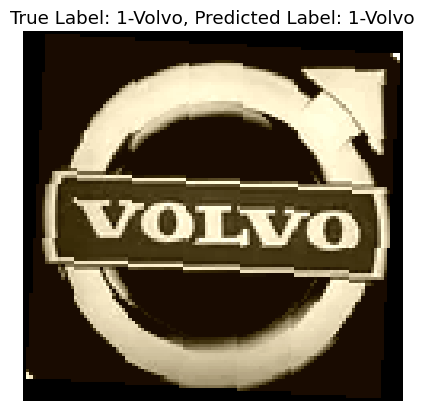

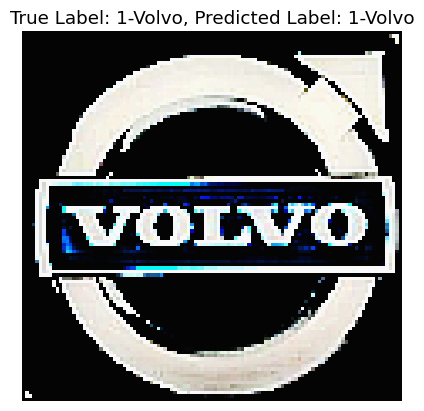

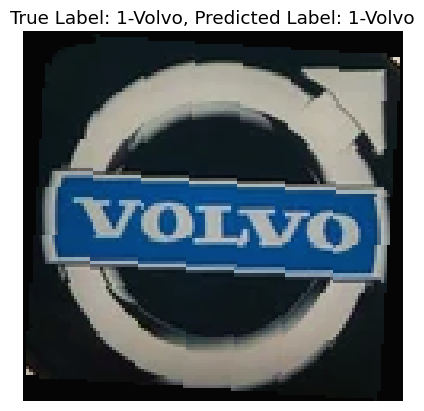

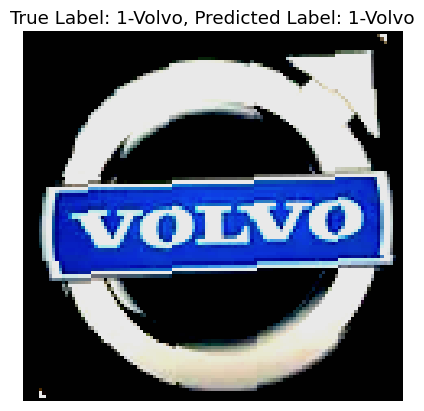

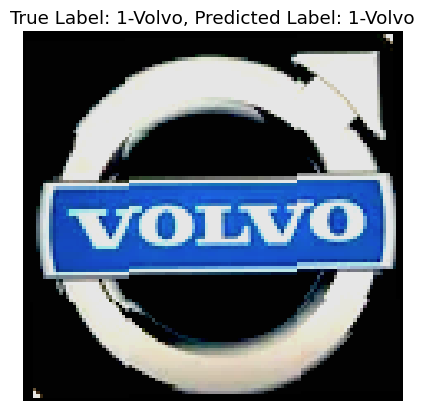

In [159]:
predictions = ensemble_model.predict(test_generator)
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(5):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

300/300 [==============================] - 5s 16ms/step


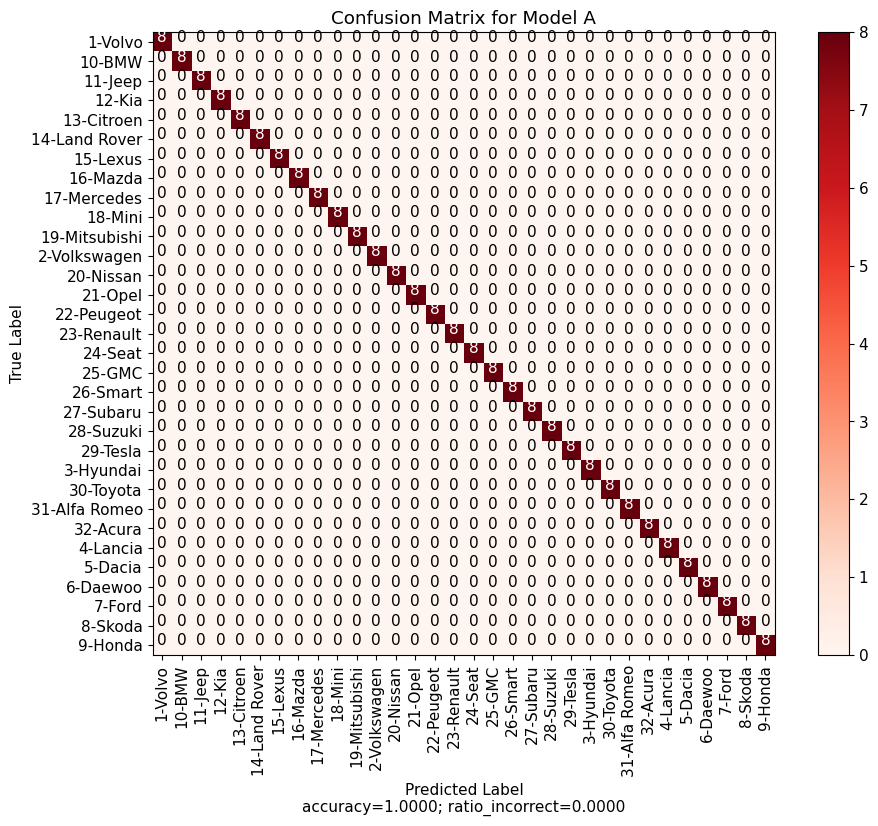

In [160]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(test_generator, ensemble_model, model_name):
    plt.rcParams.update({'font.size': 11})
    labels = test_generator.classes
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator))
    preds = np.argmax(predictions, axis=1)
    plot_labels = [k for k, v in test_generator.class_indices.items()]
    cm = tf.math.confusion_matrix(labels, preds)
    cm = np.clip(cm, 0, 8)
    ratio_correct = np.trace(cm) / np.sum(cm)
    ratio_incorrect = 1 - ratio_correct
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Reds')
    plt.colorbar()

    ticks = np.arange(len(plot_labels))
    plt.xticks(ticks, plot_labels, rotation=90)
    plt.yticks(ticks, plot_labels)

    plt.title(f'Confusion Matrix for {model_name}')
    plt.grid(False)

    threshold = 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; ratio_incorrect={:0.4f}'.format(
        ratio_correct, ratio_incorrect
    ))
plot_confusion_matrix(test_generator, ensemble_model, 'Model A')

300/300 [==============================] - 5s 16ms/step


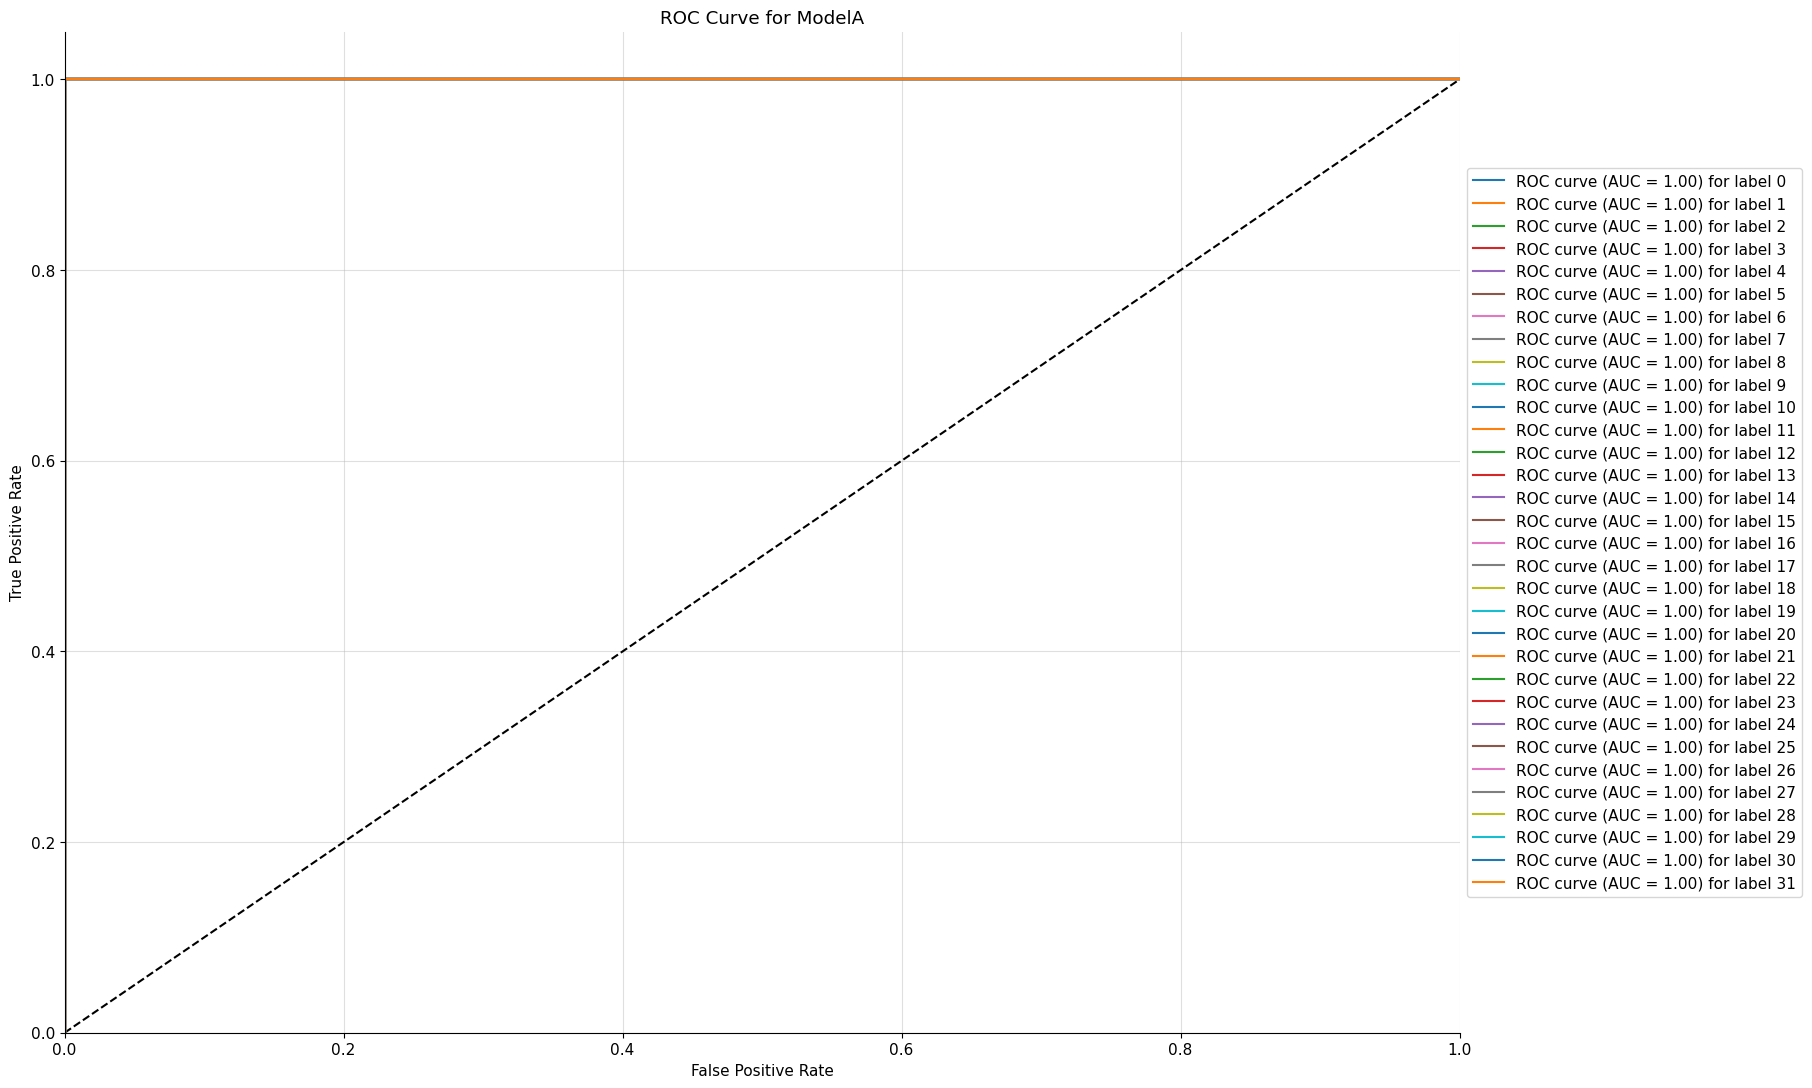

In [161]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(ensemble_model, test_generator, model_name):
    y_true = test_generator.classes
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(32):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {model_name}')

    for i in range(32):
        ax.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式：
plot_roc_curve(ensemble_model, test_generator, 'ModelA')

300/300 [==============================] - 5s 17ms/step


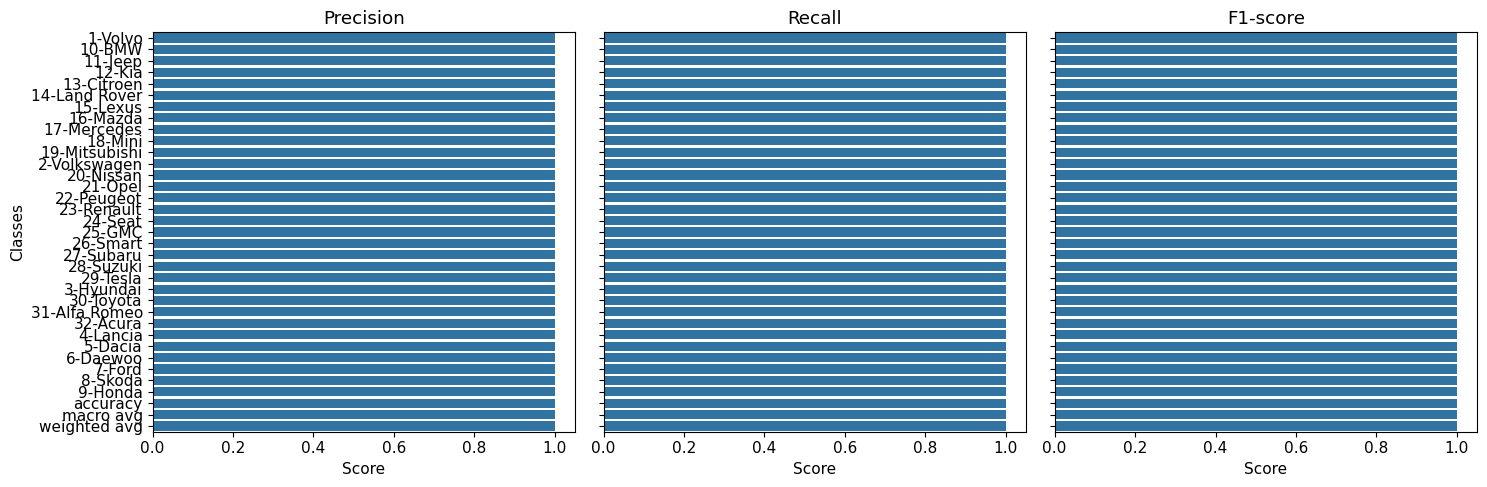

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_classification_report(df):
    """
    Plot the classification report as a set of bar plots.
    """
    # 过滤掉'support'列和'accuracy'行（如果存在）
    metrics = df.drop(columns=['support'], errors='ignore')
    metrics = metrics.drop('accuracy', errors='ignore')

    # 绘制条形图
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
    metrics = ["precision", "recall", "f1-score"]
    for idx, metric in enumerate(metrics):
        sns.barplot(x=df[metric], y=df.index, ax=axes[idx])
        axes[idx].set_title(metric.capitalize())
        axes[idx].set_xlabel('Score')
        axes[idx].set_ylabel('Classes')

    plt.tight_layout()
    plt.show()

# 使用该函数
df_report = class_report(validation_generator, ensemble_model, test_generator)
plot_classification_report(df_report)


In [163]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def class_report(validation_generator, ensemble_model, test_generator):
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    preds = np.argmax(predictions, axis=1)
    labels = validation_generator.classes
    names = np.array([i for i in validation_generator.class_indices.keys()])
    report_dict = classification_report(labels, preds, target_names=names, output_dict=True)
    df = pd.DataFrame.from_dict(report_dict).transpose()
    return df

class_report(validation_generator, ensemble_model, test_generator)

300/300 [==============================] - 5s 17ms/step


,precision,recall,f1-score,support
1-Volvo,1.0,1.0,1.0,75.0
10-BMW,1.0,1.0,1.0,75.0
11-Jeep,1.0,1.0,1.0,75.0
12-Kia,1.0,1.0,1.0,75.0
13-Citroen,1.0,1.0,1.0,75.0
14-Land Rover,1.0,1.0,1.0,75.0
15-Lexus,1.0,1.0,1.0,75.0
16-Mazda,1.0,1.0,1.0,75.0
17-Mercedes,1.0,1.0,1.0,75.0
18-Mini,1.0,1.0,1.0,75.0


In [164]:
from sklearn.metrics import confusion_matrix

def sensitivity_specificity(ensemble_model, test_generator):
    # 获取验证集上的真实标签
    y_true = test_generator.classes

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_pred = np.argmax(predictions, axis=1)

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 计算敏感性和特异性
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    return sensitivity, specificity

# 使用方式：
sensitivity, specificity = sensitivity_specificity(ensemble_model, test_generator)
print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

300/300 [==============================] - 5s 16ms/step
Sensitivity: 1.0, Specificity: 1.0


In [165]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

300/300 [==============================] - 5s 16ms/step


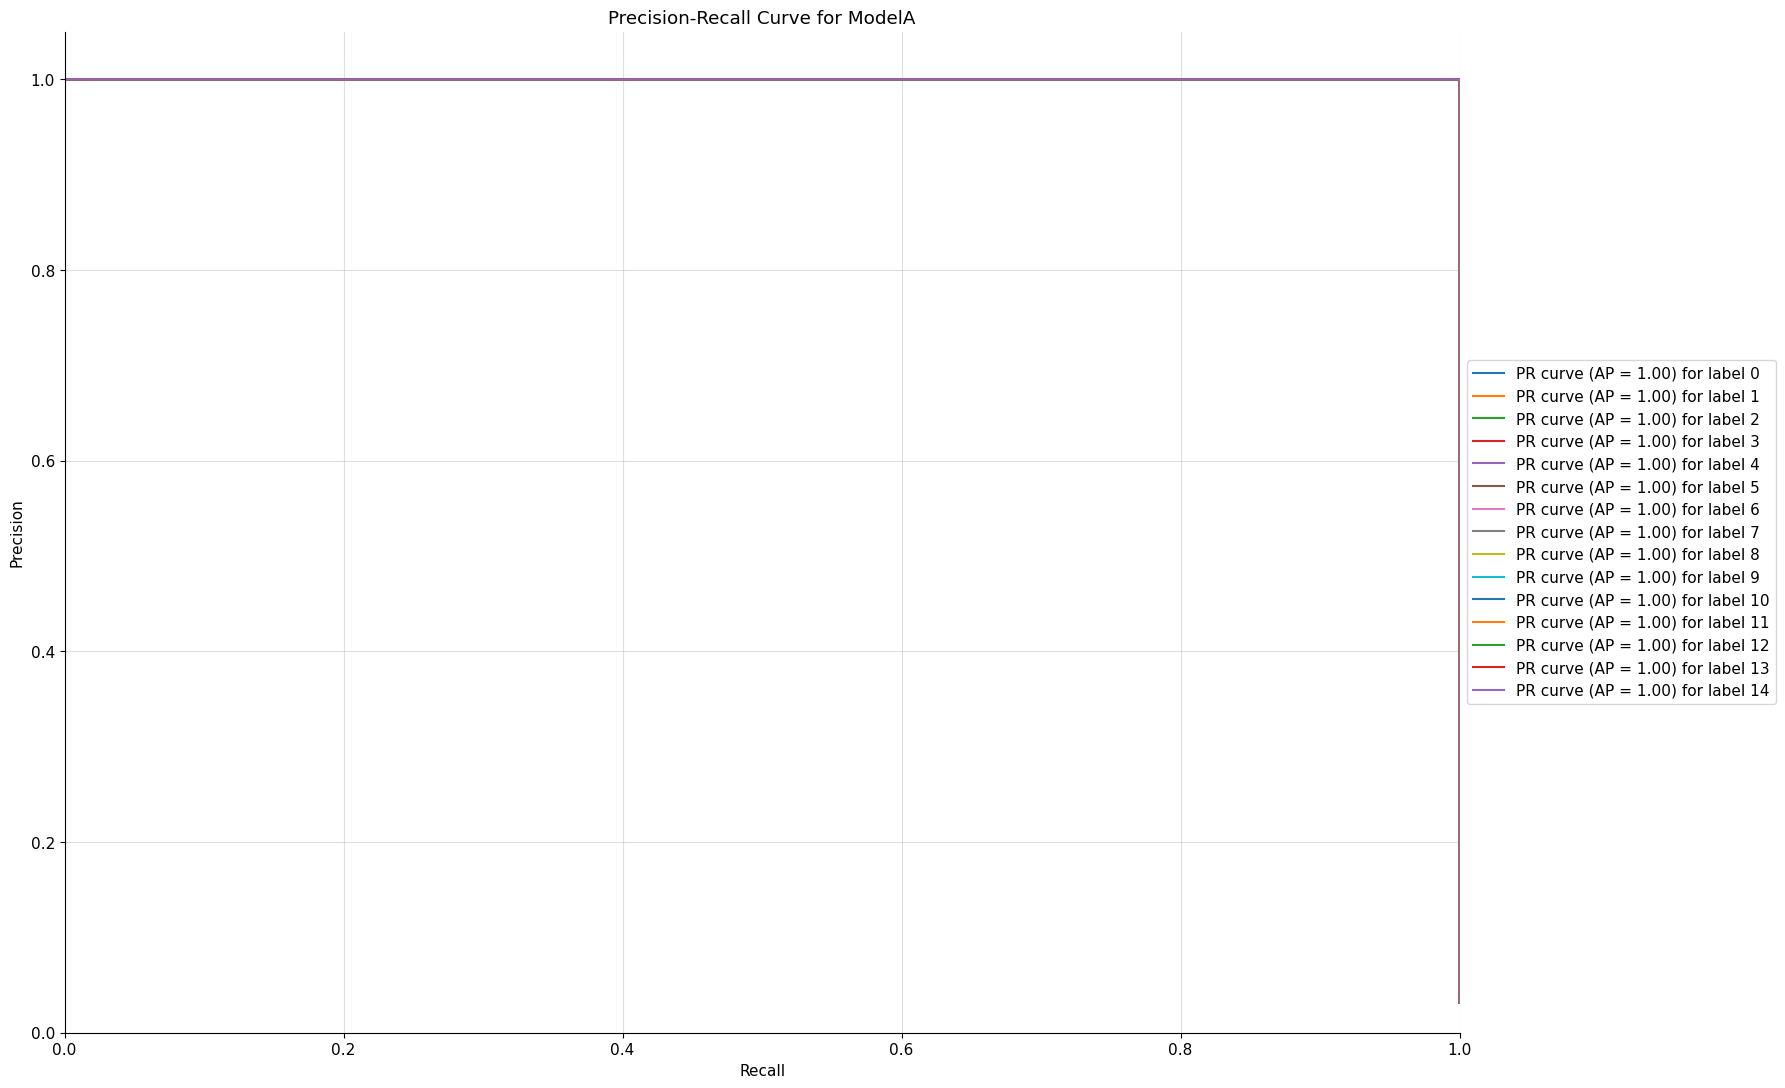

In [166]:
def plot_precision_recall_curve(ensemble_model, test_generator, model_name):
    # 获取验证集上的真实标签
    y_true = test_generator.classes  # Corrected from test_dataset to test_generator

    # 使用模型进行预测
    predictions = ensemble_model.predict(test_generator, steps=len(test_generator), verbose=1)

    # Initialize Precision and Recall dictionaries
    precision = dict()
    recall = dict()
    average_precision = dict()

    # Calculate Precision and Recall for each class
    for i in range(15):  # Assuming you have 15 classes
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
        average_precision[i] = auc(recall[i], precision[i])

    # Plot Precision-Recall curve
    fig, ax = plt.subplots(figsize=(18, 13))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve for {model_name}')

    for i in range(15):
        ax.plot(recall[i], precision[i], label='PR curve (AP = %0.2f) for label %i' % (average_precision[i], i))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# 使用方式
plot_precision_recall_curve(ensemble_model, test_generator, 'ModelA')


In [167]:
ensemble_model.save('ensemble_CAR_model.h5')

In [168]:
from matplotlib import cm
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [169]:
def make_gradcam_heatmap(image, model, last_conv_layer_name):
    # img_array = tf.keras.preprocessing.image.img_to_array(image)
    # img_array = tf.expand_dims(img_array, axis=0)
    img_array=image
    # Remove last layer's softmax
    last_layer_activation = model.layers[-1].activation
    model.layers[-1].activation = None

    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = heatmap.numpy()

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img_array[0].shape[1], img_array[0].shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.8 + img_array[0] * 255 * 0.8

    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Restore last layer activation
    model.layers[-1].activation = last_layer_activation

    return superimposed_img

In [170]:
def plot_images(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns for subplots

    axs[0].imshow(img1)
    axs[0].set_title('Image 1')
    axs[0].axis('off')  

    axs[1].imshow(img2)
    axs[1].set_title('Image 2')
    axs[1].axis('off')  # Turn off axis for better visualization

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the subplots

In [171]:
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=False,
    vertical_flip=False,
    zoom_range=0.05,
    rotation_range=25
)

In [172]:
# 读取单张图像并进行处理
img_path = 'Augmented_split/train/21-Opel/21-Opel-22.png'  # 替换为你的图像路径
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128,128))  # 加载图像并调整尺寸
img_array =tf.keras.preprocessing.image.img_to_array(img)  # 将图像转换为数组
img_array = tf.expand_dims(tf.convert_to_tensor(img_array), axis=0)

# 使用图像处理器进行处理
gen.fit(img_array)



C:\Users\61640\AppData\Local\Temp\ipykernel_14796\2645340561.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


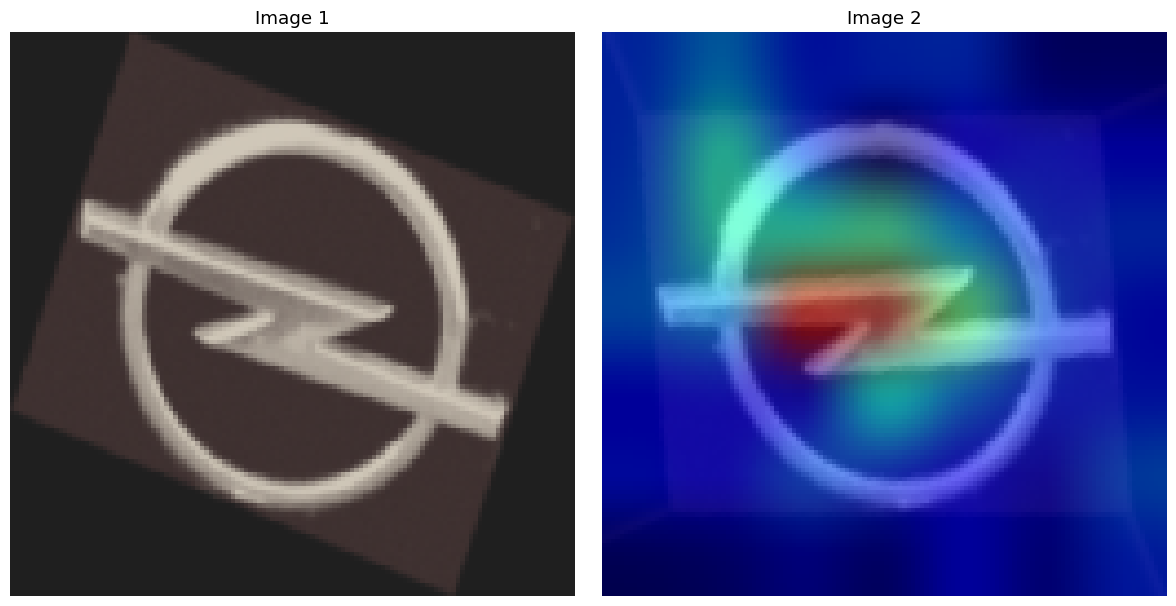

In [173]:
# 使用 flow() 方法获取处理后的图像数据
processed_img = next(gen.flow(img_array))

last_conv_layer_name = 'last_conv_model_1'
heatmaps = make_gradcam_heatmap(processed_img,ensemble_model, last_conv_layer_name)

plot_images(img,heatmaps)

In [89]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model_1

In [90]:
#You need to install numba using 'pip install numba'

from numba import cuda

cuda.select_device(0)
cuda.close()